In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/데이터마이닝/기말/Jiyun_branch/Data_Analysis_Project/population_migration_korean_preprocessed.csv')

In [2]:
df.head()

,연도,분기,분기별_연도,지역,전입자수,전출자수
0,2015,1,201501,강원특별자치도,19038.0,19840.0
1,2015,1,201501,경기도,143982.0,140535.0
2,2015,1,201501,경상남도,40249.0,40066.0
3,2015,1,201501,경상북도,29208.0,30848.0
4,2015,1,201501,광주광역시,20383.0,19891.0


In [3]:
# '전국' 행 제거
df = df[df['지역'] != '전국']

# 순이동자수 계산
df['순이동자수'] = df['전입자수'] - df['전출자수']

# 시계열 분석을 위한 '연도분기' 컬럼 생성
df['연도분기'] = df['연도'].astype(str) + 'Q' + df['분기'].astype(str)

<ipython-input-3-3000301400>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['순이동자수'] = df['전입자수'] - df['전출자수']
<ipython-input-3-3000301400>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연도분기'] = df['연도'].astype(str) + 'Q' + df['분기'].astype(str)


In [4]:
df.head()

,연도,분기,분기별_연도,지역,전입자수,전출자수,순이동자수,연도분기
0,2015,1,201501,강원특별자치도,19038.0,19840.0,-802.0,2015Q1
1,2015,1,201501,경기도,143982.0,140535.0,3447.0,2015Q1
2,2015,1,201501,경상남도,40249.0,40066.0,183.0,2015Q1
3,2015,1,201501,경상북도,29208.0,30848.0,-1640.0,2015Q1
4,2015,1,201501,광주광역시,20383.0,19891.0,492.0,2015Q1


In [5]:
df.drop(['연도', '분기', '분기별_연도'], axis=1, inplace=True)

In [6]:
df.head()

,지역,전입자수,전출자수,순이동자수,연도분기
0,강원특별자치도,19038.0,19840.0,-802.0,2015Q1
1,경기도,143982.0,140535.0,3447.0,2015Q1
2,경상남도,40249.0,40066.0,183.0,2015Q1
3,경상북도,29208.0,30848.0,-1640.0,2015Q1
4,광주광역시,20383.0,19891.0,492.0,2015Q1


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df.loc[df['연도분기'].str.contains('2025Q1')]

,지역,전입자수,전출자수,순이동자수,연도분기
2160,강원특별자치도,16562.0,17729.0,-1167.0,2025Q1
2161,경기도,131192.0,126604.0,4588.0,2025Q1
2162,경상남도,27180.0,27770.0,-590.0,2025Q1
2163,경상북도,24651.0,26029.0,-1378.0,2025Q1
2164,광주광역시,13622.0,14616.0,-994.0,2025Q1
2165,대구광역시,24529.0,24309.0,220.0,2025Q1
2166,대전광역시,18177.0,18192.0,-15.0,2025Q1
2167,부산광역시,28545.0,29923.0,-1378.0,2025Q1
2168,서울특별시,99146.0,99942.0,-796.0,2025Q1
2169,세종특별자치시,5378.0,5250.0,128.0,2025Q1


In [9]:
years = range(2015, 2026)
regions = ['강원특별자치도', '경기도', '경상남도', '경상북도', '광주광역시',
           '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시',
           '울산광역시', '인천광역시', '전라남도', '전북특별자치도', '제주특별자치도',
           '충청남도', '충청북도']

# 2015Q1부터 2025Q1까지의 '연도분기' 리스트 생성
time_periods = [f"{year}Q{q}" for year in years for q in range(1, 5)]
time_periods = time_periods[:time_periods.index("2025Q2")] # 2025Q1까지만 포함

# 임의의 데이터 생성
data_list = []
for period in time_periods:
    for region in regions:
        # 현실적인 데이터 패턴을 위해 지역별 특성 부여
        if region == '세종특별자치시':
            net_migration = np.random.randint(3000, 10000)
        elif region == '서울특별시':
            net_migration = np.random.randint(-8000, -1000)
        elif region == '경기도':
            net_migration = np.random.randint(1000, 9000)
        else:
            net_migration = np.random.randint(-2000, 2000)
        data_list.append({'연도분기': period, '지역': region, '순이동자수': net_migration})

visual_df = pd.DataFrame(data_list)

In [10]:
visual_df.head()

,연도분기,지역,순이동자수
0,2015Q1,강원특별자치도,-1762
1,2015Q1,경기도,8653
2,2015Q1,경상남도,-1211
3,2015Q1,경상북도,954
4,2015Q1,광주광역시,-191


In [11]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

^C
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache direc

In [12]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

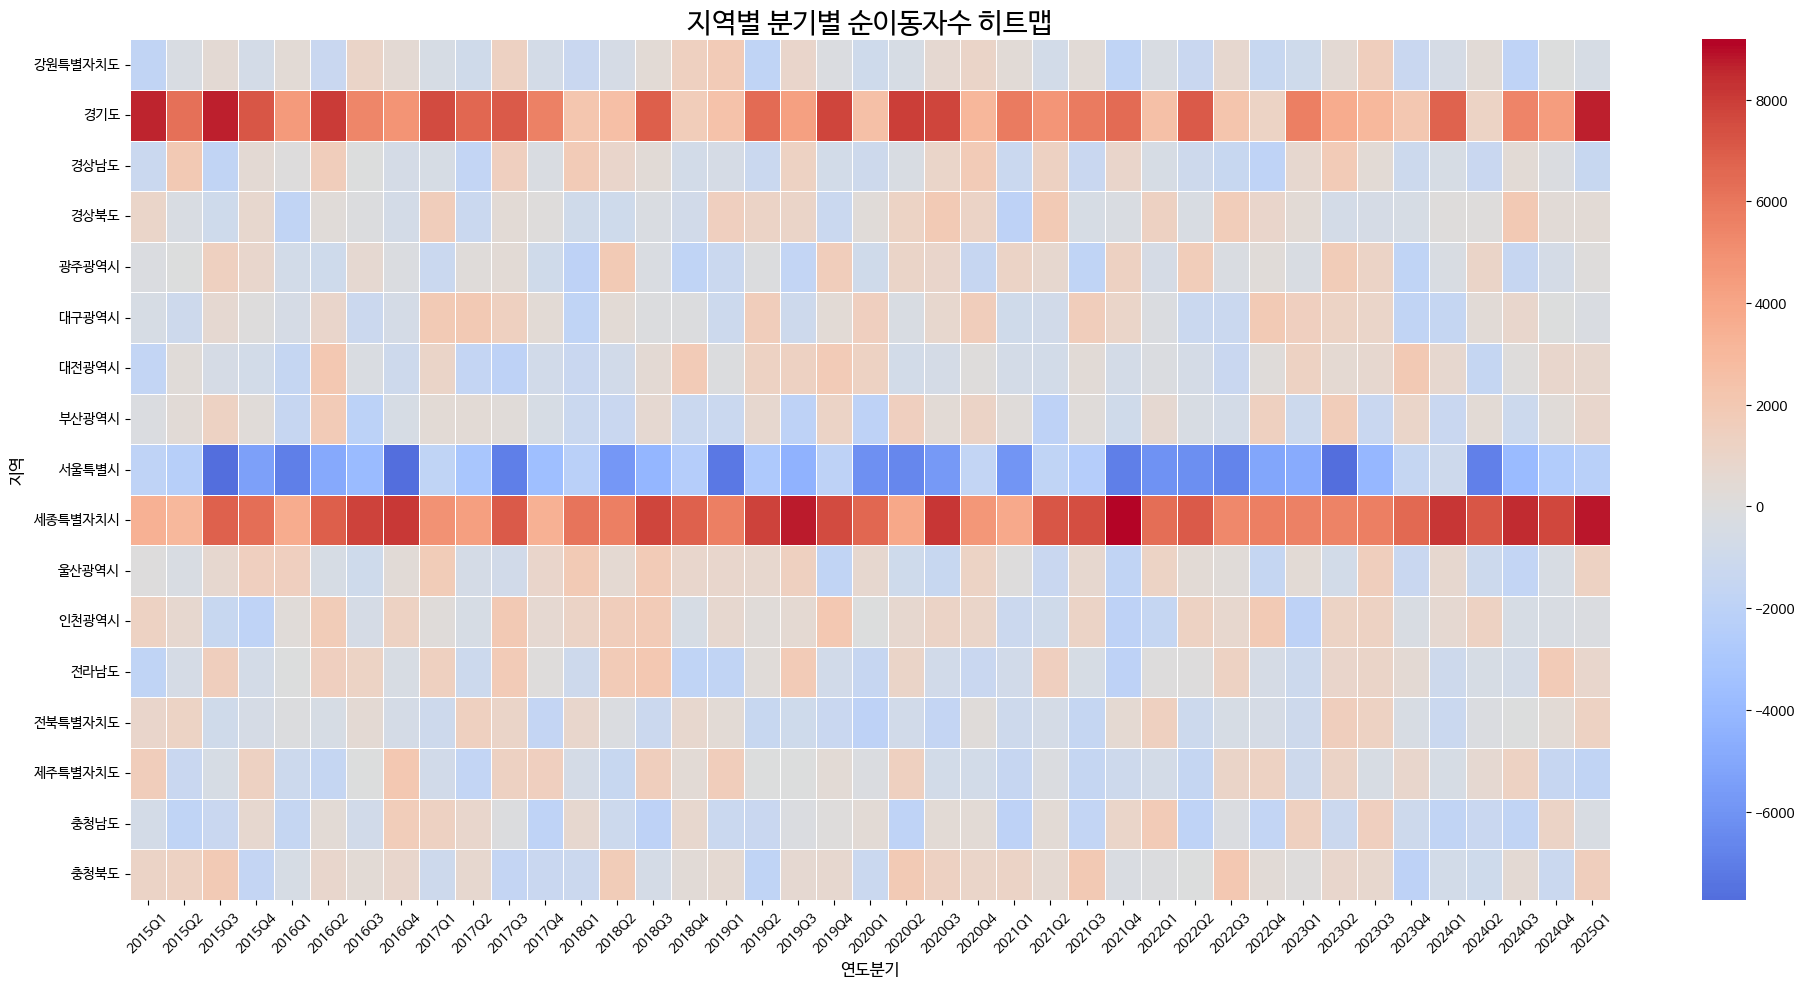

In [13]:
# 히트맵 시각화

# Pivot 테이블 생성: 행=지역, 열=연도분기, 값=순이동자수
try:
    pivot_df = visual_df.pivot(index='지역', columns='연도분기', values='순이동자수')

    plt.figure(figsize=(20, 10))
    sns.heatmap(
        pivot_df,
        cmap='coolwarm',  # 양수(따뜻한 색), 음수(차가운 색)으로 표현
        center=0,         # 색상의 기준점을 0으로 설정
        annot=False,      # 셀에 숫자 표기는 생략 (너무 많아서 복잡해짐)
        linewidths=.5     # 셀 간 경계선
    )
    plt.title('지역별 분기별 순이동자수 히트맵', fontsize=20)
    plt.xlabel('연도분기', fontsize=12)
    plt.ylabel('지역', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"  - 히트맵 생성 오류: {e}")

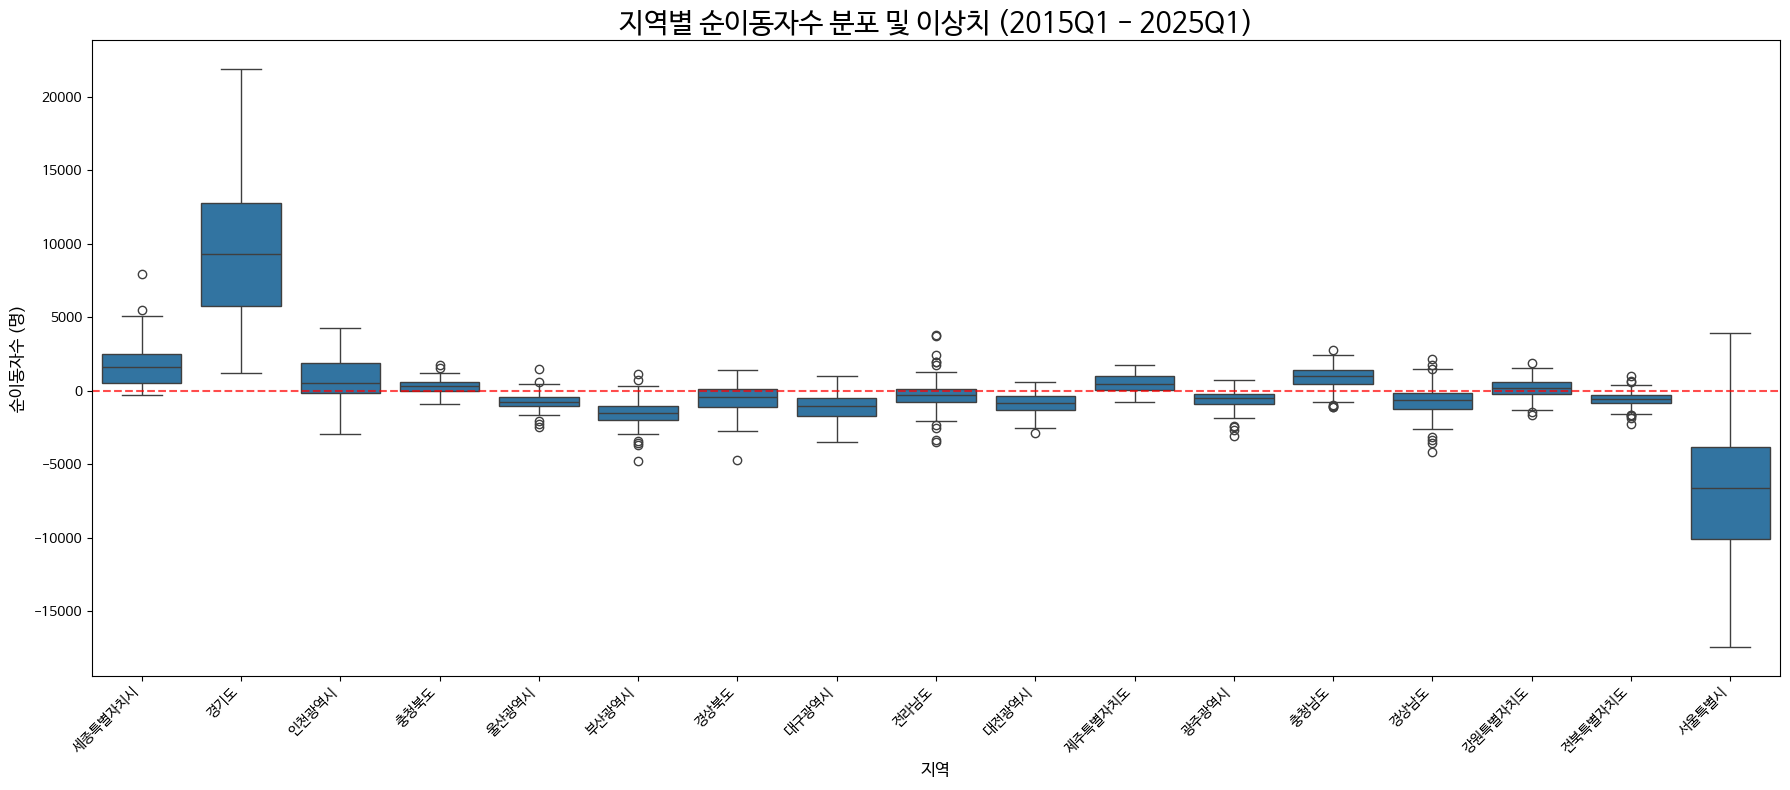

In [15]:
# 3. 박스플롯: 지역별 인구 이동 규모 및 이상치 탐색

# 지역을 순이동자수 중앙값 기준으로 정렬하여 보기 쉽게 만듦
sorted_regions = visual_df.groupby('지역')['순이동자수'].median().sort_values(ascending=False).index

plt.figure(figsize=(18, 8))
sns.boxplot(
    x='지역',
    y='순이동자수',
    data=df,
    order=sorted_regions # 정렬된 순서로 표시
)
plt.axhline(0, color='red', linestyle='--', alpha=0.7) # 0 기준선 추가
plt.title('지역별 순이동자수 분포 및 이상치 (2015Q1 - 2025Q1)', fontsize=20)
plt.xlabel('지역', fontsize=12)
plt.ylabel('순이동자수 (명)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()